# Simple Prophet Examples

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
import pandas as pd
import os 
import fbprophet

# help ipython find our path
directory = os.path.dirname(os.path.dirname(os.path.abspath('')))
os.chdir(directory)

import forecastframe as ff

## Non-Hierarchical Example

In [3]:
prophet_data = pd.read_csv("https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv")

In [4]:
prophet_data

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


In [5]:
fframe = ff.ForecastFrame(data=prophet_data, target="y", datetime_column="ds")

In [6]:
fframe

                 y
ds                
1992-01-01  146376
1992-02-01  147079
1992-03-01  159336
1992-04-01  163669
1992-05-01  170068
...            ...
2016-01-01  400928
2016-02-01  413554
2016-03-01  460093
2016-04-01  450935
2016-05-01  471421

[293 rows x 1 columns]

In [14]:
fframe.predict(model="prophet", future_periods=10, weekly_seasonality=True, daily_seasonality=True)
fframe.predictions


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,
1992-01-01,149291.352945,121307.634450,140154.899266,149291.352945,149291.352945,13380.395789,13380.395789,13380.395789,2210.670827,2210.670827,2210.670827,-33794.192766,-33794.192766,-33794.192766,131088.226795
1992-02-01,150340.205130,121208.465138,141753.082047,150340.205130,150340.205130,13380.395789,13380.395789,13380.395789,-2423.603498,-2423.603498,-2423.603498,-30394.370302,-30394.370302,-30394.370302,130902.627119
1992-03-01,151321.389431,154970.047000,174426.131661,151321.389431,151321.389431,13380.395789,13380.395789,13380.395789,-4791.070892,-4791.070892,-4791.070892,4630.699595,4630.699595,4630.699595,164541.413924
1992-04-01,152370.241616,154720.984667,173621.864064,152370.241616,152370.241616,13380.395789,13380.395789,13380.395789,2210.670827,2210.670827,2210.670827,-3323.935217,-3323.935217,-3323.935217,164637.373016
1992-05-01,153385.259859,169136.581988,188961.889853,153385.259859,153385.259859,13380.395789,13380.395789,13380.395789,-42.917514,-42.917514,-42.917514,12332.866991,12332.866991,12332.866991,179055.605125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-07,449843.564818,464966.268266,484262.224243,449843.564818,449843.564818,13380.395789,13380.395789,13380.395789,-2423.603498,-2423.603498,-2423.603498,13558.354239,13558.354239,13558.354239,474358.711349
2016-05-08,449889.809161,463139.982088,483208.655277,449889.809161,449889.809161,13380.395789,13380.395789,13380.395789,-4791.070892,-4791.070892,-4791.070892,14364.307724,14364.307724,14364.307724,472843.441782
2016-05-09,449936.053503,468579.599503,488407.391521,449936.053503,449936.053503,13380.395789,13380.395789,13380.395789,-373.057488,-373.057488,-373.057488,15252.166550,15252.166550,15252.166550,478195.558355


In [23]:
fframe.plot_components()

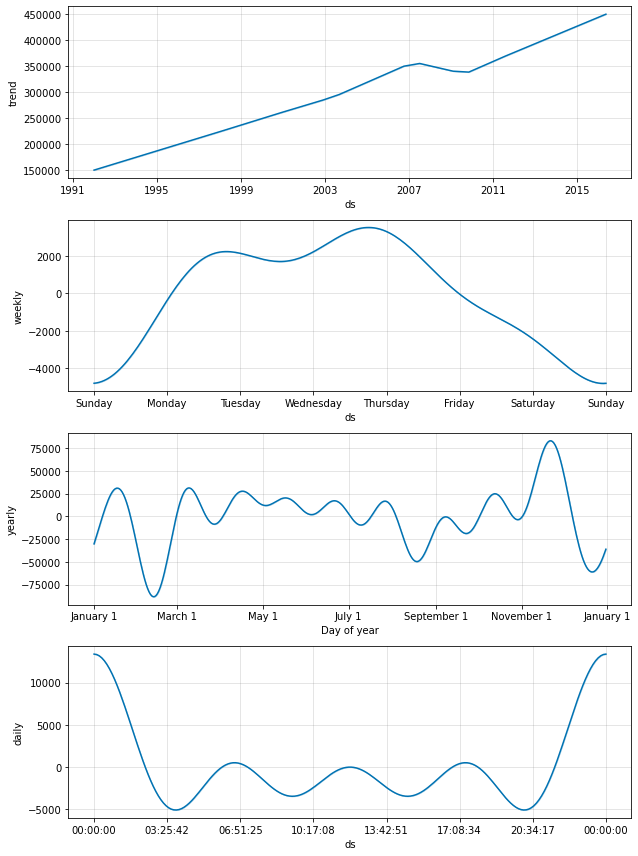

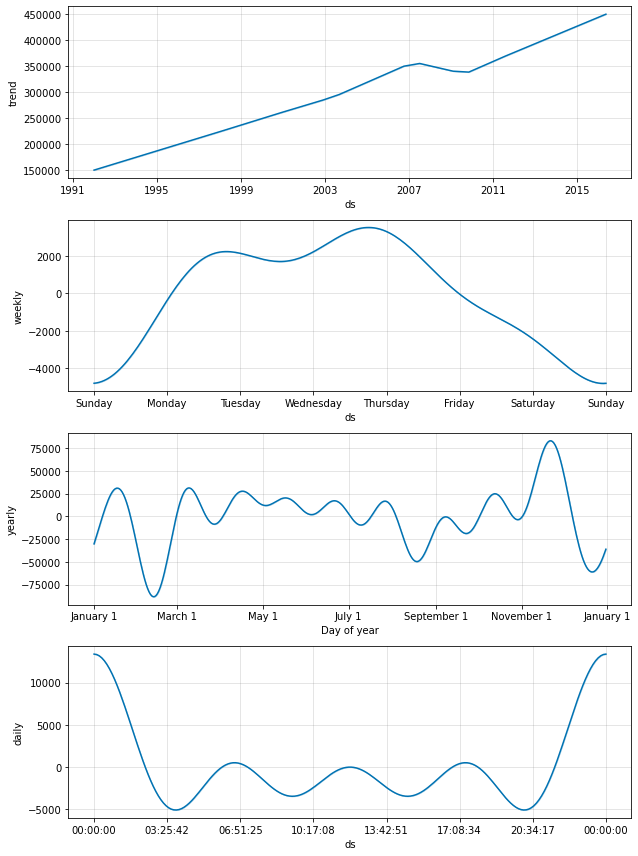

In [24]:
fframe.plot_components()

In [19]:
fframe.get_predictions()

,trend,yhat_upper,yhat_lower,yhat
ds,,,,
1992-01-01,149291.352945,140154.899266,121307.634450,131088.226795
1992-02-01,150340.205130,141753.082047,121208.465138,130902.627119
1992-03-01,151321.389431,174426.131661,154970.047000,164541.413924
1992-04-01,152370.241616,173621.864064,154720.984667,164637.373016
1992-05-01,153385.259859,188961.889853,169136.581988,179055.605125
...,...,...,...,...
2016-05-07,449843.564818,484262.224243,464966.268266,474358.711349
2016-05-08,449889.809161,483208.655277,463139.982088,472843.441782
2016-05-09,449936.053503,488407.391521,468579.599503,478195.558355
